In [2]:
import os


'd:\\college_work\\4th year\\Sem7th\\Project\\major-project\\Code\\Heart-Disease-Classification-with-Electrocardiogram'

In [ ]:
os.chdir("../")
%pwd

In [31]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
#? augmented data with swt  
X_train_aug = np.load("./artifacts/data_transformation/new_swt_Aug/X_train.npy")
y_train_aug = np.load("./artifacts/data_transformation/new_swt_Aug/y_train.npy")
X_test_aug = np.load("./artifacts/data_transformation/new_swt_Aug/X_test.npy")
y_test_aug = np.load("./artifacts/data_transformation/new_swt_Aug/y_test.npy")
X_val_aug = np.load("./artifacts/data_transformation/new_swt_Aug/X_val.npy")
y_val_aug = np.load("./artifacts/data_transformation/new_swt_Aug/y_val.npy")
print(f"size of X_train {X_train_aug.shape}, size of y_train{y_train_aug.shape}")
# print(f"size of X_test {X_test_aug.shape}, size of y_test {y_test_aug.shape}")
# print(f"size of X_val {X_val_aug.shape}, size of y_val {y_val_aug.shape}")
X_train_aug_dl = X_train_aug
y_train_aug_dl = to_categorical(y_train_aug,num_classes=5)
X_test_aug_dl = X_test_aug
X_val_aug_dl = X_val_aug
y_test_aug_dl = to_categorical(y_test_aug,num_classes=5)
y_val_aug_dl = to_categorical(y_val_aug,num_classes=5)
sc = StandardScaler()
X_train_aug_ml = X_train_aug.reshape(-1,12000)
X_val_aug_ml = X_val_aug.reshape(-1,12000)
X_test_aug_ml = X_test_aug.reshape(-1,12000)
sc_tr = sc.fit(X_train_aug_ml)
y_train_aug_ml = y_train_aug
y_test_aug_ml = y_test_aug
y_val_aug_ml = y_val_aug
X_train_aug_ml = sc_tr.transform(X_train_aug_ml)
X_val_aug_ml = sc_tr.transform(X_val_aug_ml)
X_test_aug_ml = sc_tr.transform(X_test_aug_ml)
print(np.unique(y_train_aug,return_counts=True))

    # # transformation of Trainig data for DL modesl
    # mean = np.mean(X_train_aug, axis=(0, 1)) 
    # std = np.std(X_train_aug, axis=(0, 1)) 
    # X_train_aug_dl = (X_train_aug - mean)/std

    # mean1 = np.mean(X_test_aug, axis=(0, 1)) 
    # std1 = np.std(X_test_aug, axis=(0, 1)) 
    # X_test_aug_dl = (X_test_aug - mean1)/std1

    # mean2 = np.mean(X_val_aug, axis=(0, 1)) 
    # std2 = np.std(X_val_aug, axis=(0, 1)) 
    # X_val_aug_dl = (X_val_aug - mean2)/std2

X_train_aug_dl.shape

size of X_train (17957, 1000, 12), size of y_train(17957,)
(array([0, 1, 2, 3, 4], dtype=int64), array([7243, 4043, 2903, 2353, 1415], dtype=int64))


(17957, 1000, 12)

In [33]:
import tensorflow as tf

from tensorflow.keras.layers import LSTM, LeakyReLU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, GlobalAveragePooling1D, BatchNormalization, ReLU, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau, TensorBoard
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy, F1Score
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json


In [16]:
norm_model = load_model("./artifacts/model_training/model/norm-cnn/05-0.72.keras")

with open('./artifacts/model_training/model/norm-cnn/history-norm-cnn.pkl', 'rb') as f:
    history = pickle.load(f)

print(history)

{'loss': [1.1121220588684082, 0.6829075813293457, 0.4561708867549896, 0.3096718192100525, 0.2045685052871704, 0.14871519804000854, 0.10950592160224915, 0.08951537311077118, 0.07437168806791306, 0.05689655989408493], 'precision_1': [0.7339982390403748, 0.8171586394309998, 0.8735178112983704, 0.9128789901733398, 0.9431993365287781, 0.9557437300682068, 0.9682397246360779, 0.9726718068122864, 0.9771965146064758, 0.9831312894821167], 'recall_1': [0.37294647097587585, 0.6752241253852844, 0.79996657371521, 0.8735312223434448, 0.9210335612297058, 0.9428635239601135, 0.9609066247940063, 0.9672551155090332, 0.9736592769622803, 0.9801748394966125], 'auc_1': [0.8018978834152222, 0.9319719076156616, 0.9688342213630676, 0.9849756360054016, 0.9930980801582336, 0.9963943362236023, 0.9979280233383179, 0.9986200332641602, 0.9989156723022461, 0.999413788318634], 'categorical_accuracy': [0.5809433460235596, 0.7559726238250732, 0.8398953080177307, 0.8944700956344604, 0.9330623149871826, 0.950548529624939, 

In [27]:
with open("./artifacts/model_training/model/norm-cnn/model1.json", 'w') as f:
    json.dump(history,f,indent=4)

In [37]:
norm_y_pred = norm_model.predict(X_test_aug_dl)

52/52 [==============================] - 7s 17ms/step


In [38]:
y_true = np.argmax(y_test_aug_dl, axis=1)
y_pred = np.argmax(norm_y_pred, axis=1)
confusion_matrix(y_true,y_pred)


array([[823,  18,  42,  18,  11],
       [ 92, 117,  29,  16,   2],
       [ 61,  17, 157,   2,   5],
       [ 55,  12,   5, 107,   5],
       [ 35,   0,   7,   3,  11]], dtype=int64)

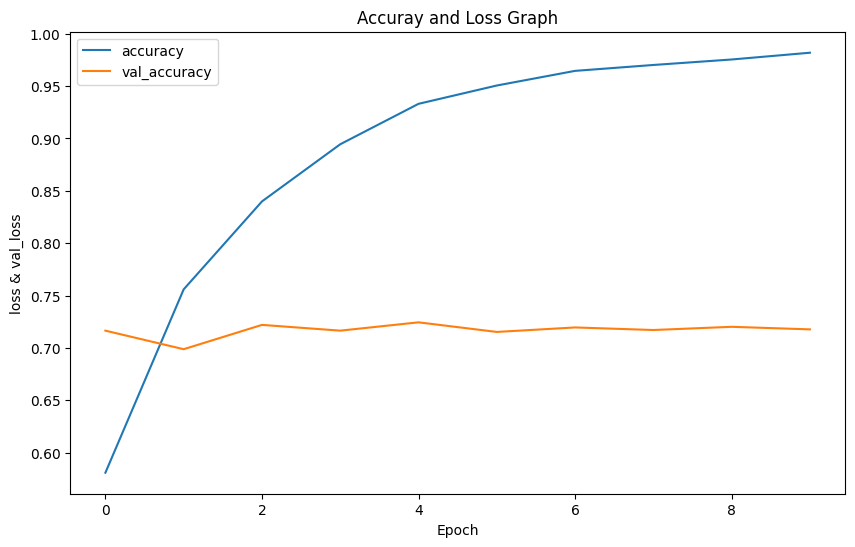

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history["accuracy"], label="accuracy")
plt.plot(history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("loss & val_loss")
plt.legend()

plot_filename = "./artifacts/model_training/images/accuracy_plot-model_102.png"
plt.savefig(plot_filename)
plt.title("Accuray and Loss Graph")
plt.show()

## model 2 ECG lense

In [29]:
LCNN_model = load_model("./artifacts/model_training/model/high_performance_ecgnet_models/17-0.79.h5")

with open('./artifacts/model_training/model/high_performance_ecgnet_models/history-high_performance_ecgnet.pkl', 'rb') as f:
    history2 = pickle.load(f)

print(history2)

{'loss': [0.9188839793205261, 0.7369750142097473, 0.6899999976158142, 0.6484907865524292, 0.6331422328948975, 0.603159487247467, 0.5911427736282349, 0.5731990933418274, 0.5665287375450134, 0.5538997650146484, 0.5386472940444946, 0.5315014123916626, 0.5251002907752991, 0.5136657953262329, 0.5076797008514404, 0.49646642804145813, 0.4843805432319641, 0.47187748551368713, 0.4736068844795227, 0.4565054476261139, 0.4510650038719177, 0.43648776412010193, 0.4270874261856079, 0.4286781847476959, 0.41167208552360535, 0.40392374992370605, 0.3901556134223938], 'precision': [0.7636381983757019, 0.803520917892456, 0.8151525855064392, 0.8246616125106812, 0.8300096392631531, 0.8328540325164795, 0.8387821912765503, 0.8387346267700195, 0.8383795619010925, 0.8465943336486816, 0.8469741940498352, 0.8485591411590576, 0.8509469032287598, 0.8512911200523376, 0.8527694344520569, 0.8510318398475647, 0.856692910194397, 0.8602471351623535, 0.8595253825187683, 0.8615068197250366, 0.862907886505127, 0.864083230495

In [30]:
with open("./artifacts/model_training/model/high_performance_ecgnet_models/model2.json", 'w') as f:
    json.dump(history2,f,indent=4)

In [32]:
y_pred_cnn = LCNN_model.predict(X_test_aug_dl)

52/52 [==============================] - 22s 314ms/step


In [35]:
y_test_aug_dl.shape,y_pred_cnn.shape

((1650, 5), (1650, 5))

In [42]:
y_true = np.argmax(y_test_aug_dl, axis=1)
y_pred = np.argmax(y_pred_cnn, axis=1)
cons = confusion_matrix(y_true,y_pred)
cons

array([[871,  12,  16,   2,  11],
       [ 95, 140,  16,   3,   2],
       [ 61,  17, 160,   0,   4],
       [ 60,   8,   7, 106,   3],
       [ 28,   1,   2,   1,  24]], dtype=int64)

C:\Users\Ukant\AppData\Local\Temp\ipykernel_15132\1643525561.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(


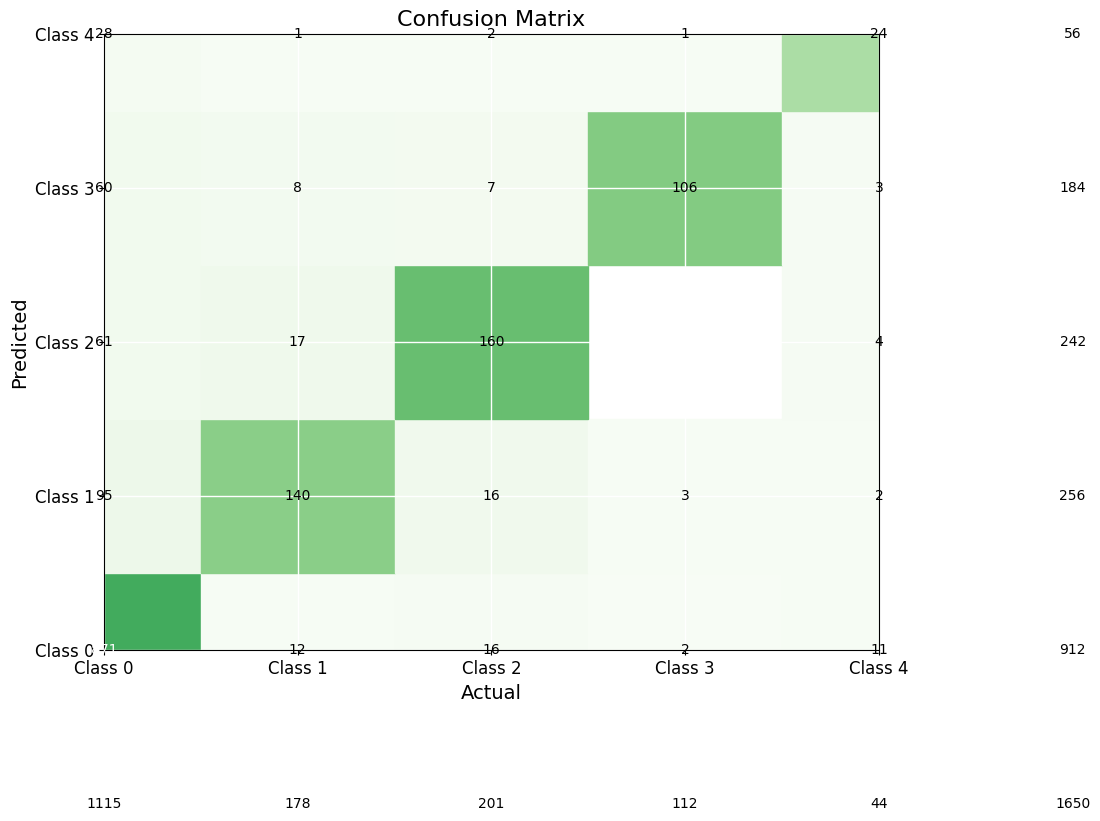

In [43]:
import numpy as np
import matplotlib.pyplot as plt

confusion_matrix = cons
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

row_sums = confusion_matrix.sum(axis=1)
col_sums = confusion_matrix.sum(axis=0)
total_sum = confusion_matrix.sum()

fig, ax = plt.subplots(figsize=(10, 8))

ax = plt.subplot()
ax.set_xlabel('Actual', fontsize=14)
ax.set_ylabel('Predicted', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)
rows = confusion_matrix.shape[0]
cols = confusion_matrix.shape[1]
ax.set_xticks(np.arange(cols))
ax.set_yticks(np.arange(rows))
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels(labels, fontsize=12)

ax.grid(True, which='both', color='w', linestyle='-', linewidth=1)

for i in range(rows):
    for j in range(cols):
        value = confusion_matrix[i, j]
        row_sum = row_sums[i]
        col_sum = col_sums[j]
        if value > 0:
            ax.text(j, i, str(value), fontsize=10, ha='center', va='center',
                    color='white' if value > max(row_sum, col_sum) * 0.7 else 'black')
            ax.add_patch(plt.Rectangle(
                (j - 0.5, i - 0.5), 1, 1, fill=True,
                color=plt.cm.Greens((value / max(row_sum, col_sum)) * 0.8),
                edgecolor='white'))
        else:
            ax.text(j, i, '', fontsize=10, ha='center', va='center')

for i in range(rows):
    ax.text(cols, i, str(row_sums[i]), fontsize=10, ha='center', va='center')
    ax.text(i, -1, str(col_sums[i]), fontsize=10, ha='center', va='center')

ax.text(cols, -1, str(total_sum), fontsize=10, ha='center', va='center')

plt.show()

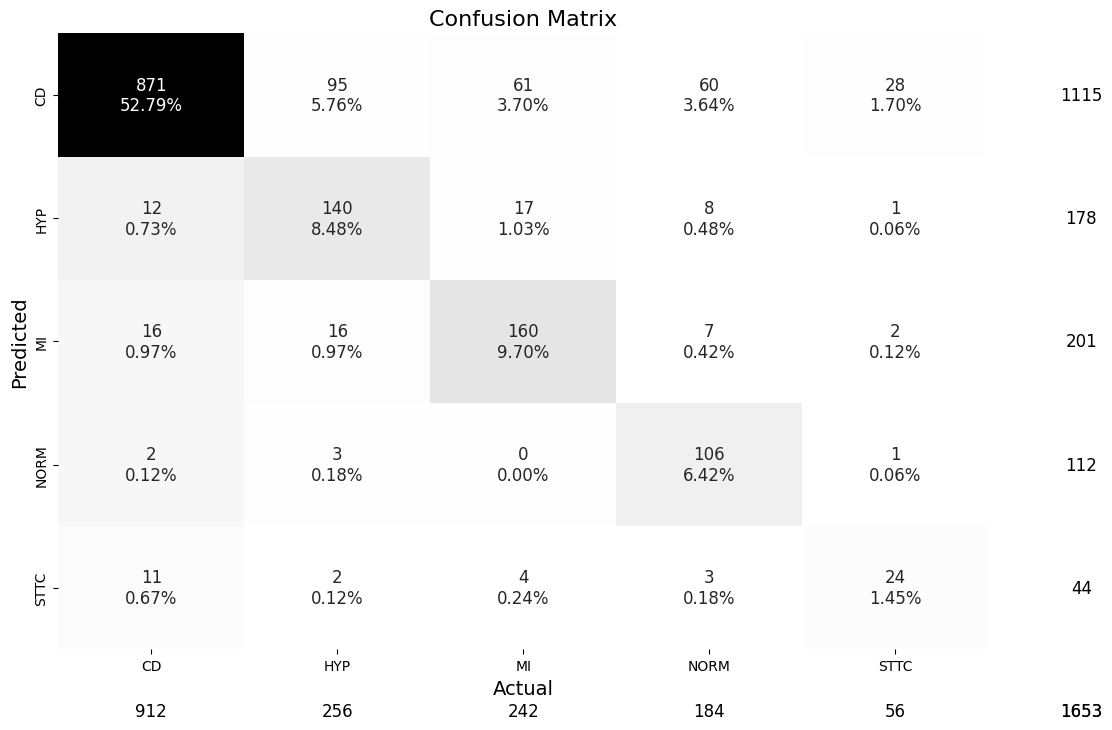

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

actual = ["CD", "HYP", "MI", "NORM", "STTC", "sum_lin"]

predicted = ["CD", "HYP", "MI", "NORM", "STTC", "Predicted"]


data = np.array(
    [
        [871,  12,  16,   2,  11, 1115],
        [ 95, 140,  16,   3,   2, 178],
        [ 61,  17, 160,   0,   4, 201],
        [ 60,   8,   7, 106,   3, 112],
        [ 28,   1,   2,   1,  24,  44],
        [912, 256, 242, 184, 56, 1653]
    ]
)

# Percentages for the confusion matrix
percentages = np.array(
    [
       [52.78787879,  0.72727273,  0.96969697,  0.12121212,  0.66666667],
       [ 5.75757576,  8.48484848,  0.96969697,  0.18181818,  0.12121212],
       [ 3.6969697 ,  1.03030303,  9.6969697 ,  0.        ,  0.24242424],
       [ 3.63636364,  0.48484848,  0.42424242,  6.42424242,  0.18181818],
       [ 1.6969697 ,  0.06060606,  0.12121212,  0.06060606,  1.45454545]
    ]
)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(
    data[:-1, :-1],
    annot=True,
    fmt=".2g",
    # cmap="YlGn",
    cmap='Greys',
    xticklabels=actual[:-1],
    yticklabels=predicted[:-1],
    ax=ax,
    cbar=False,
    annot_kws={"fontsize": 12},
)

for i in range(len(data) - 1):
    for j in range(len(data[i]) - 1):
        text = ax.texts[j * (len(data) - 1) + (i)]
        text.set_text("{}\n{:.2f}%".format(data[i, j], percentages[i, j]))

# ax.text(-0.5, len(data), 'Predicted', ha='right', va='center', fontweight='bold', fontsize=14)
for i in range(len(data)):
    ax.text(
        len(data) - 0.5,
        i + 1 - 0.5,
        str(data[i, -1]),
        ha="center",
        va="center",
        color="black",
        fontsize=12,
    )
for j in range(len(data)):
    ax.text(
        j + 1 - 0.5,
        len(data) - 0.5,
        str(data[-1, j]),
        ha="center",
        va="center",
        color="black",
        fontsize=12,
    )

ax.set_title("Confusion Matrix", fontsize=16)
ax.set_xlabel("Actual", fontsize=14)
ax.set_ylabel("Predicted", fontsize=14)

plt.show()

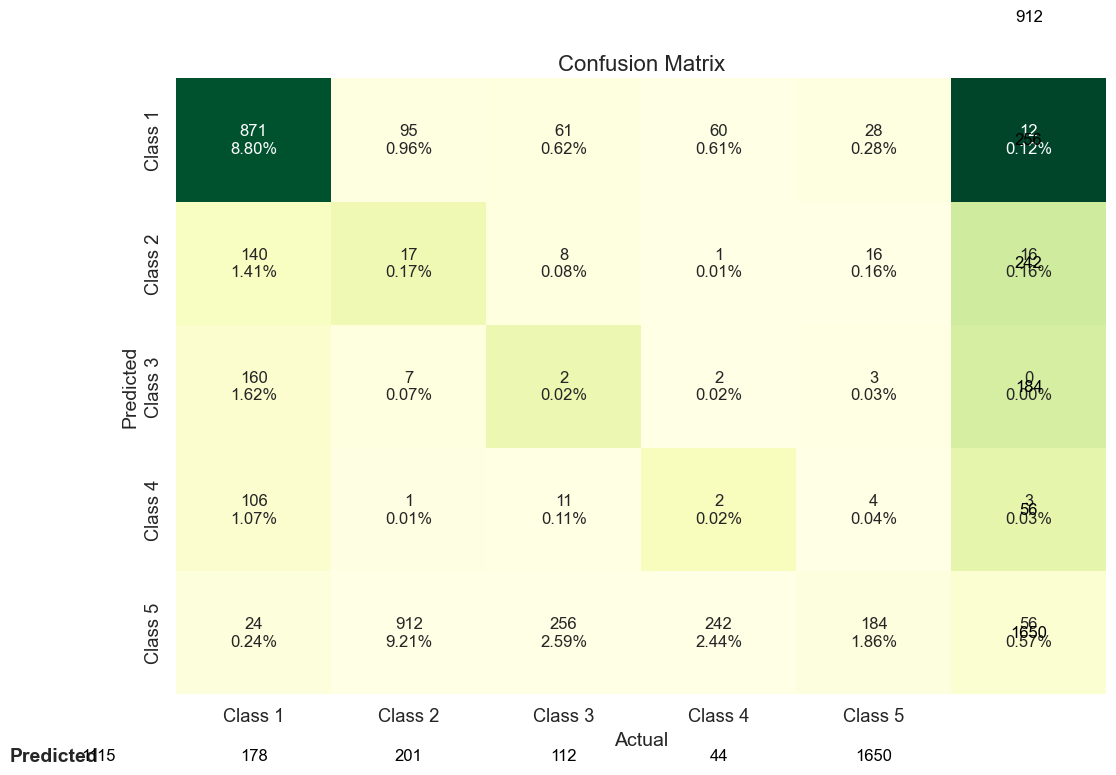

In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.array([[871, 12, 16, 2, 11],
                 [95, 140, 16, 3, 2],
                 [61, 17, 160, 0, 4],
                 [60, 8, 7, 106, 3],
                 [28, 1, 2, 1, 24],
                 ])

sum_rows = data.sum(axis=1)
sum_cols = data.sum(axis=0)
data = np.column_stack((data, sum_rows))
# data = np.row_stack((data, sum_cols))
data= np.concatenate((data,sum_rows[:,None]),axis=1)


total = data.sum()
percentages = (data / total) * 100

actual = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'sum_lin']

predicted = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Predicted']

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the confusion matrix
sns.heatmap(data[:-1, :-1], annot=True, fmt='.2g', cmap='YlGn', xticklabels=actual[:-1], yticklabels=predicted[:-1], ax=ax, cbar=False, annot_kws={'fontsize': 12})

# Add percentages to the heatmap annotations (excluding sum rows and columns)
for i in range(len(data)-1):
    for j in range(len(data[i])-1):
        text = ax.texts[j*(len(data)-1)+(i)]
        text.set_text('{}\n{:.2f}%'.format(data[i,j], percentages[i,j]))

# Plot the sum rows and columns separately
ax.text(-0.5, len(data)-0.5, 'Predicted', ha='right', va='center', fontweight='bold', fontsize=14)
for i in range(len(data)):
    ax.text(len(data)-0.5, i-0.5, str(int(data[i,-1])), ha='center', va='center', color='black', fontsize=12)
for j in range(len(data)):
    ax.text(j-0.5, len(data)-0.5, str(int(data[-1,j])), ha='center', va='center', color='black', fontsize=12)

# Set title and axis labels
ax.set_title('Confusion Matrix', fontsize=16)
ax.set_xlabel('Actual', fontsize=14)
ax.set_ylabel('Predicted', fontsize=14)

# Display the plot
plt.show()

In [179]:
data = np.array([[871, 12, 16, 2, 11],
                 [95, 140, 16, 3, 2],
                 [61, 17, 160, 0, 4],
                 [60, 8, 7, 106, 3],
                 [28, 1, 2, 1, 24],
                 ])

data2 = np.array([[871, 12, 16, 2, 11],
                 [95, 140, 16, 3, 2],
                 [61, 17, 160, 0, 4],
                 [60, 8, 7, 106, 3],
                 [28, 1, 2, 1, 24],
                 [1115  ,178  ,201  ,112  , 44]

                 ])


# Calculate sum of rows and columns
sum_rows = data.sum(axis=1)
sum_cols = data.sum(axis=0)
print(f'adding in columns stack {sum_rows}')
print(f'adding in columns stack {sum_cols}')
data1 = np.column_stack((data, sum_rows))
data2 = np.row_stack((data, sum_cols))
# data1= np.concatenate((data,sum_rows[:,None]),axis=1)
# data,sum_rows,sum_cols
total = data.sum()
percentages1 = (data / total) * 100
# data1,data2
percentages1

adding in columns stack [912 256 242 184  56]
adding in columns stack [1115  178  201  112   44]


array([[52.78787879,  0.72727273,  0.96969697,  0.12121212,  0.66666667],
       [ 5.75757576,  8.48484848,  0.96969697,  0.18181818,  0.12121212],
       [ 3.6969697 ,  1.03030303,  9.6969697 ,  0.        ,  0.24242424],
       [ 3.63636364,  0.48484848,  0.42424242,  6.42424242,  0.18181818],
       [ 1.6969697 ,  0.06060606,  0.12121212,  0.06060606,  1.45454545]])

In [132]:
np.unique(y_test_aug_dl,return_counts=True)

(array([0., 1.], dtype=float32), array([6600, 1650], dtype=int64))

In [131]:
sum_cols,sum_rows

(array([1115,  178,  201,  112,   44]), array([912, 256, 242, 184,  56]))

In [ ]:
def ECG_classifier(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation="softmax"))
    return model

input_shape = (1000, 12)
num_classes = 5
model = build_high_performance_ecgnet(input_shape, num_classes)
metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
    f1_m
]
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)
history = model.fit(
    X_train_aug_dl,y_train_aug_dl,
    epochs=10,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/pre-final1/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
    ],
)

In [ ]:
import pandas as pd
import numpy as np
import wfdb
import ast
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data
path = 'path/to/ptbxl/'
sampling_rate=100
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))
X = load_raw_data(Y, sampling_rate, path)
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)
test_fold = 10
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [ ]:
import numpy as np
import pywt
def SWT_augmentation(
    s: np.ndarray,
    wavelet_family: str = "db",
    level: int = None,
    padding: str = "symmetric",
    coefficient_manipulation: str = None,
    normalize: bool = False,
) -> np.ndarray:
    if not isinstance(s, np.ndarray):
        raise TypeError("Input signal 's' must be a NumPy array.")
    if not isinstance(wavelet_family, str):
        raise TypeError("Input 'wavelet_family' must be a string.")
    if not isinstance(level, int) and level is not None:
        raise ValueError("Input 'level' must be an integer or None.")
    if padding not in ["symmetric", "zero", "periodic"]:
        raise ValueError(
            "Invalid padding strategy. Choose from 'symmetric', 'zero', or 'periodic'."
        )
    max_level = pywt.swt_max_level(len(s))
    level = level if level is not None else max_level
    wavelet = pywt.wavelist(wavelet_family)[0]
    original_length = len(s)
    pad_width = 0
    if len(s) % 2 != 0:
        pad_width = 1
    if padding == "symmetric":
        s_padded = np.pad(s, pad_width=pad_width, mode="symmetric")
    elif padding == "zero":
        s_padded = np.pad(s, pad_width=pad_width, mode="constant", constant_values=0)
    else:  
        s_padded = np.pad(s, pad_width=pad_width, mode="wrap")
    coeffs = pywt.swt(s_padded, wavelet, level=level, trim_approx=True, norm=True)
    if coefficient_manipulation == "drop_high_freq":
        coeffs[level:] = [np.zeros_like(c) for c in coeffs[level:]]
    elif coefficient_manipulation == "randomize":
        num_coeffs = len(coeffs)
        indices_to_randomize = np.random.choice(
            num_coeffs, size=num_coeffs // 4, replace=False
        )
        for idx in indices_to_randomize:
            coeffs[idx] = np.random.normal(0, 1, size=coeffs[idx].shape)
    augmented_signal = pywt.iswt(coeffs, wavelet, norm=True)
    augmented_signal = augmented_signal[pad_width : pad_width + original_length]
    if normalize:
        augmented_signal = (
            augmented_signal - augmented_signal.mean()
        ) / augmented_signal.std()
    return augmented_signal.T

In [95]:
data = np.array(
    [
        [871, 12, 16, 2, 11],
        [95, 140, 16, 3, 2],
        [61, 17, 160, 0, 4],
        [60, 8, 7, 106, 3],
        [28, 1, 2, 1, 24],
    ]
)

sum_rows = data.sum(axis=1)
sum_cols = data.sum(axis=0)
print(sum_rows.shape,data.shape,sum_cols.shape)
data = np.column_stack((data, sum_rows))
# data = np.row_stack((data, sum_cols))
np.concatenate((data,sum_rows[:,None]),axis=1)

(5,) (5, 5) (5,)


array([[871,  12,  16,   2,  11, 912, 912],
       [ 95, 140,  16,   3,   2, 256, 256],
       [ 61,  17, 160,   0,   4, 242, 242],
       [ 60,   8,   7, 106,   3, 184, 184],
       [ 28,   1,   2,   1,  24,  56,  56]])

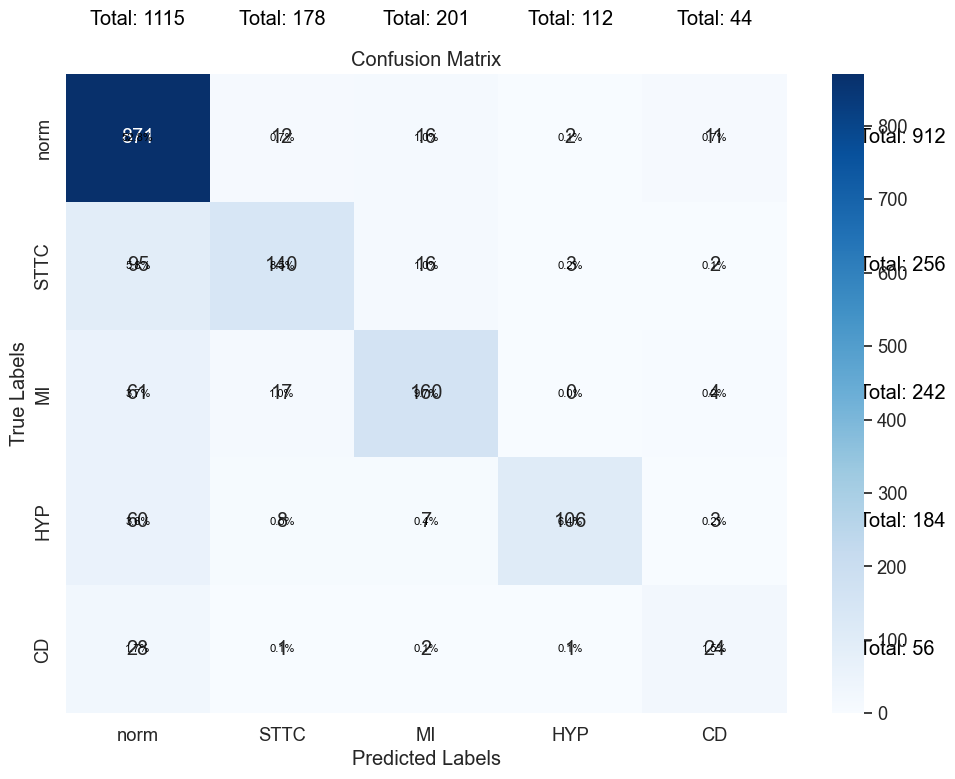

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = np.array([[871, 12, 16, 2, 11],
                        [95, 140, 16, 3, 2],
                        [61, 17, 160, 0, 4],
                        [60, 8, 7, 106, 3],
                        [28, 1, 2, 1, 24]])

class_names = ['norm', 'STTC', 'MI', 'HYP', 'CD']

row_sums = np.sum(conf_matrix, axis=1)
col_sums = np.sum(conf_matrix, axis=0)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

for i in range(conf_matrix.shape[0]):
    plt.text(conf_matrix.shape[1] + 0.5, i + 0.5, f'Total: {row_sums[i]}', ha='left', va='center', color='black')

for j in range(conf_matrix.shape[1]):
    plt.text(j + 0.5, -0.5, f'Total: {col_sums[j]}', ha='center', va='top', color='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

total_samples = np.sum(conf_matrix)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        percentage = conf_matrix[i, j] / total_samples * 100
        plt.text(j + 0.5, i + 0.5, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()


### Model 3 lstm

In [40]:
lstm_model = load_model("./artifacts/model_training/model/lstm_final/.18-0.77.keras")
# y_pred_lstm = lstm_model.predict(X_test_aug_dl)


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 1000, 12], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_2'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']